In [2]:
#importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from collections import Counter

In [3]:
#Setting options
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.float_format", "{:,.2f}".format)

In [4]:
df = pd.read_csv(r"E:\Portfolio\Projects\E-Commerce\2-Final Version\1_Cleaning And Transformation\Pak Ecommerce Cleaned Dataset.csv", low_memory = False)
df

,item_id,order_status,created_at,product_id,price,quantity,total_price,increment_id,category,sales_commission_code,discount,payment_method,working_date,bi_status,MV,year,month,customer_since,month_year,financial_year,customer_id
0,"211,131.00",complete,2016-07-01,kreations_YI 06-L,"1,950.00",1.00,"1,950.00",100147443,Women's Fashion,\N,0.00,cod,7/1/2016,#REF!,"1,950","2,016.00",7.00,2016-07-01,2016-07-01,FY17,1.00
1,"211,133.00",canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.00,1.00,240.00,100147444,Beauty & Grooming,\N,0.00,cod,7/1/2016,Gross,240,"2,016.00",7.00,2016-07-01,2016-07-01,FY17,2.00
2,"211,134.00",canceled,2016-07-01,Ego_UP0017-999-MR0,"2,450.00",1.00,"2,450.00",100147445,Women's Fashion,\N,0.00,cod,7/1/2016,Gross,"2,450","2,016.00",7.00,2016-07-01,2016-07-01,FY17,3.00
3,"211,135.00",complete,2016-07-01,kcc_krone deal,360.00,1.00,60.00,100147446,Beauty & Grooming,R-FSD-52352,300.00,cod,7/1/2016,Net,360,"2,016.00",7.00,2016-07-01,2016-07-01,FY17,4.00
4,"211,136.00",refund,2016-07-01,BK7010400AG,555.00,2.00,"1,110.00",100147447,Soghaat,\N,0.00,cod,7/1/2016,Valid,"1,110","2,016.00",7.00,2016-07-01,2016-07-01,FY17,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,"905,204.00",pending,2018-08-28,WOFSCE5AE00357AECDE,699.00,1.00,849.00,100562385,Women's Fashion,\N,0.00,cod,8/28/2018,Valid,699,"2,018.00",8.00,2018-08-01,2018-08-01,FY19,"115,320.00"
584520,"905,205.00",pending,2018-08-28,MATHUA5AF70A7D1E50A,"35,599.00",1.00,"35,899.00",100562386,Mobiles & Tablets,\N,0.00,bankalfalah,8/28/2018,Gross,"35,599","2,018.00",8.00,2018-08-01,2018-08-01,FY19,"115,326.00"
584521,"905,206.00",pending,2018-08-28,MATSAM5B6D7208C6D30,"129,999.00",2.00,"652,178.00",100562387,Mobiles & Tablets,\N,0.00,bankalfalah,8/28/2018,Gross,"259,998","2,018.00",8.00,2018-07-01,2018-08-01,FY19,"113,474.00"
584522,"905,207.00",pending,2018-08-28,MATSAM5B1509B4696EA,"87,300.00",2.00,"652,178.00",100562387,Mobiles & Tablets,\N,0.00,bankalfalah,8/28/2018,Gross,"174,600","2,018.00",8.00,2018-07-01,2018-08-01,FY19,"113,474.00"


In [10]:

print(df.category.value_counts())
print("")
print(df.order_status.value_counts())

category
Mobiles & Tablets     115874
Men's Fashion          92221
Women's Fashion        59721
Appliances             52413
Superstore             43613
Beauty & Grooming      41496
Others                 37068
Soghaat                34011
Home & Living          26504
Entertainment          26326
Health & Sports        17502
Kids & Baby            16494
Computing              15933
School & Education      3478
Books                   1870
Name: count, dtype: int64

order_status
complete    312149
canceled    201753
refund       67583
pending       3039
Name: count, dtype: int64


In [11]:
#plotting outliers
palette = ({
"Others":"red",
"Computing":"cyan",
"Entertainment":"gray",
"Appliances":"black",
"Mobiles & Tablets":"green",
"Men's Fashion":"orange",
"Women's Fashion":"pink",
"Superstore":"blue",
"Beauty & Grooming":"purple",
"Health & Sports":"navy",
"Home & Living":"brown",
"Soghaat":"lime",
"Kids & Baby":"teal",
"School & Education":"brown",
"Books":"yellow"
})

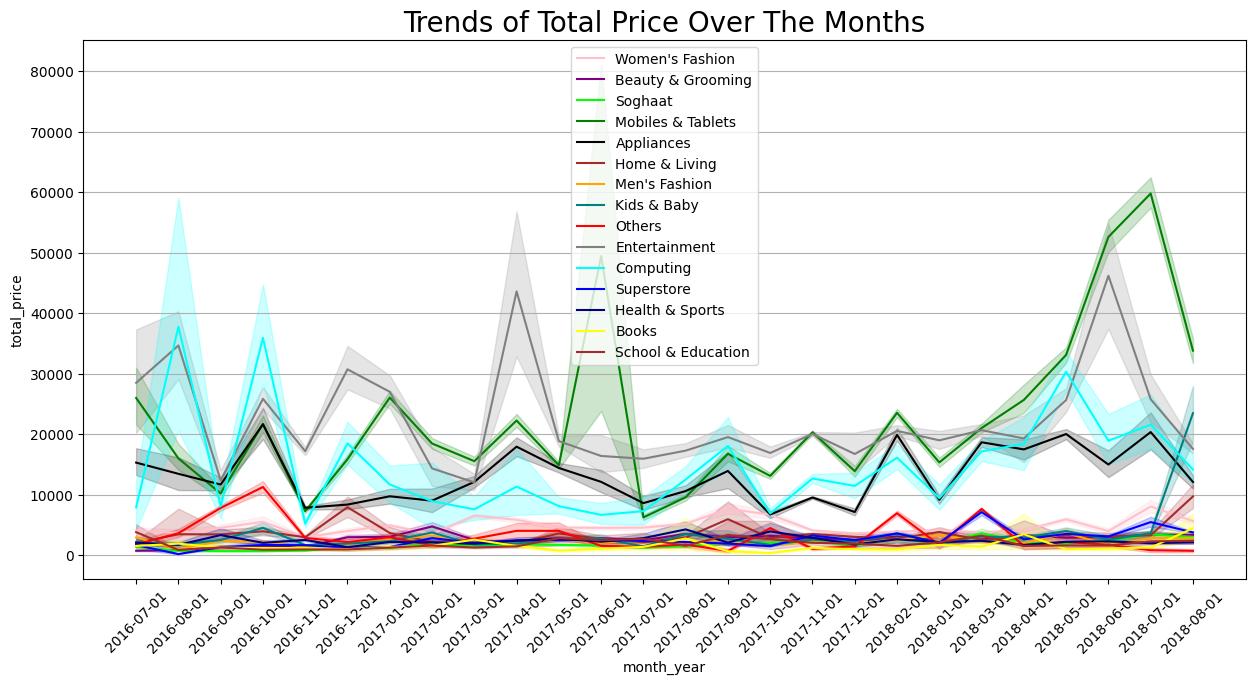

In [12]:
#plotting and looking at the trends all over the data set
plt.figure(figsize=(15,7))
sns.lineplot(data = df, x = "month_year", y = "total_price", hue = "category", palette = palette)
plt.title("Trends of Total Price Over The Months", fontsize = 20)
plt.grid(axis = "y")
plt.legend()
plt.xticks(rotation = 45)
plt.show()

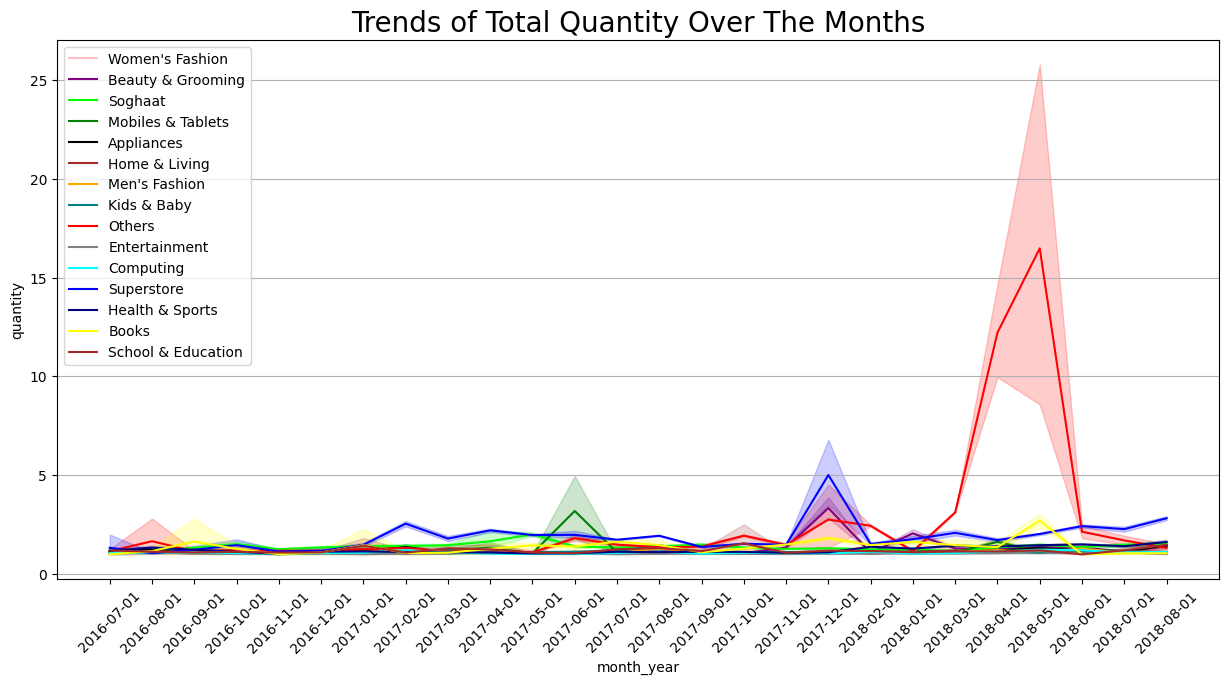

In [13]:
#plotting and looking at the trends all over the data set
plt.figure(figsize=(15,7))
sns.lineplot(data = df, x = "month_year", y = "quantity", hue = "category", palette = palette)
plt.title("Trends of Total Quantity Over The Months", fontsize = 20)
plt.grid(axis = "y")
plt.legend()
plt.xticks(rotation = 45)
plt.show()

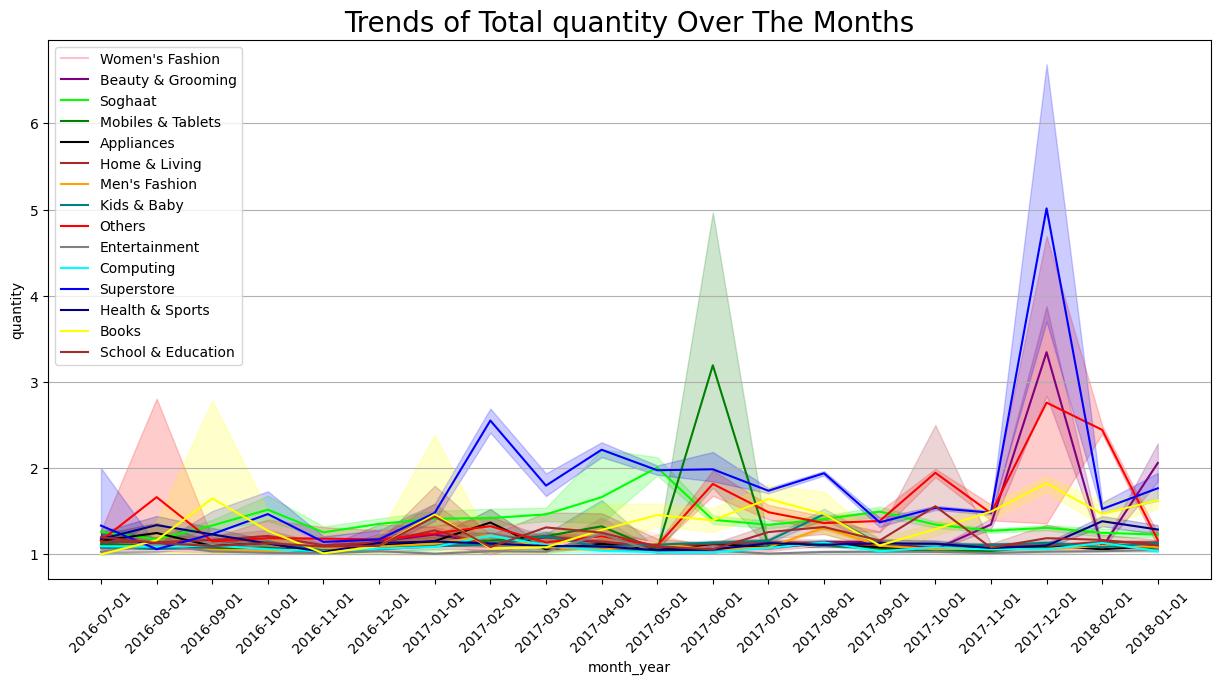

In [14]:
outliers = df[~(df["month_year"]>= "2018-03-01")&(df["month_year"]<="2018-07-01")]
#plotting and looking at the trends all over the data set
plt.figure(figsize=(15,7))
sns.lineplot(data = outliers, x = "month_year", y = "quantity", hue = "category", palette = palette)
plt.title("Trends of Total quantity Over The Months", fontsize = 20)
plt.grid(axis = "y")
plt.legend()
plt.xticks(rotation = 45)
plt.show()

In [15]:
#plotting and looking at the trends all over the data set
# plt.figure(figsize=(15,7))
# sns.lineplot(data = df, x = "month_year", y = "increment_id", hue = "category", palette = palette)
# plt.title("Trends of Total Quantity Over The Months", fontsize = 20)
# plt.grid(axis = "y")
# plt.legend()
# plt.xticks(rotation = 45)
# plt.show()
print("Due to Hardware limitations of my laptop, I cannot execute this")

Due to Hardware limitations of my laptop, I cannot execute this


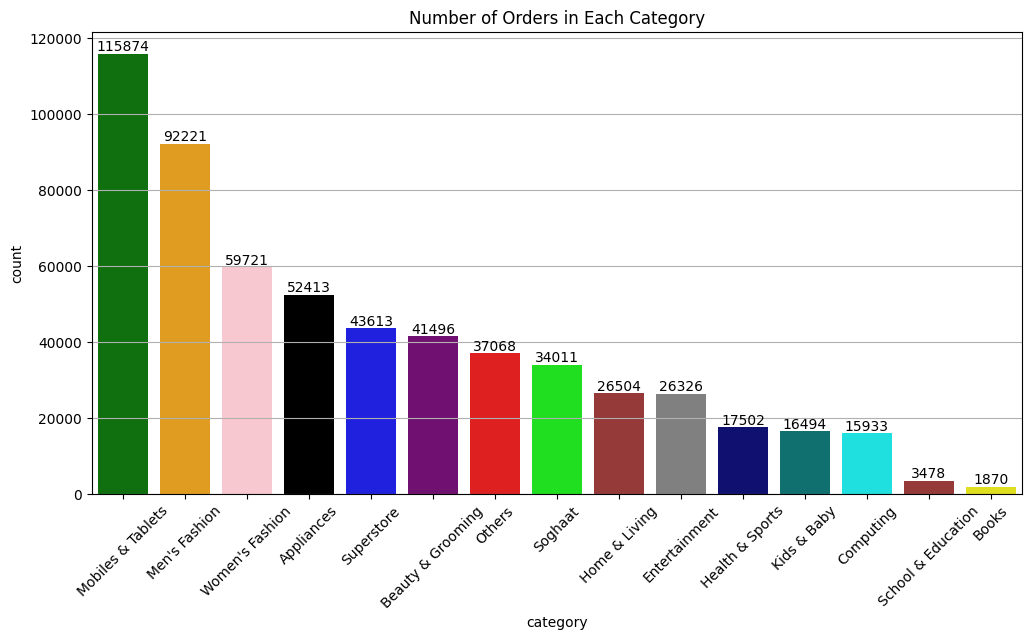

In [16]:
#plotting graph for highest selling category
plt.figure(figsize = (12,6))
ax = sns.countplot(data = df, x = "category", hue = "category", palette = palette, order = df['category'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")
plt.xticks(rotation = 45)  
plt.grid(axis = "y")
plt.title("Number of Orders in Each Category")
plt.show()

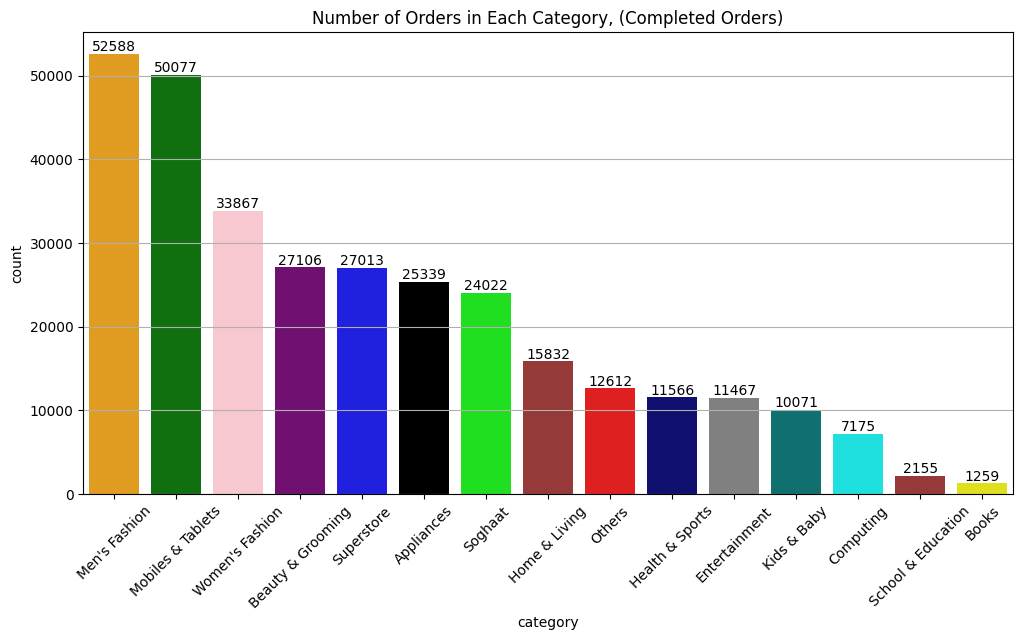

In [17]:
#plotting graph for highest selling category, Only completed orders
complete = df[df['order_status'] == 'complete']
plt.figure(figsize = (12,6))
ax = sns.countplot(data = complete, x = "category", hue = "category", palette = palette, order = complete['category'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")
plt.grid(axis = "y")
plt.xticks(rotation = 45)
plt.title("Number of Orders in Each Category, (Completed Orders)")
plt.show()

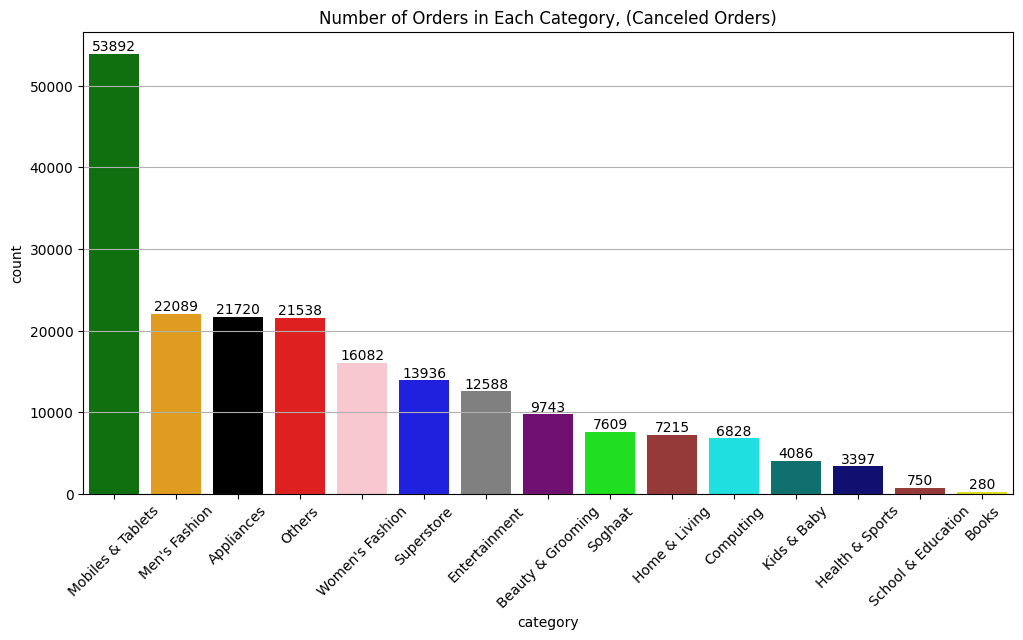

In [18]:
#plotting graph for highest selling category, Only Cancelled orders
cancelled = df[df['order_status'] == 'canceled']
plt.figure(figsize = (12,6))
ax = sns.countplot(data = cancelled, x = "category", hue = "category", palette = palette, order = cancelled['category'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")
plt.grid(axis = "y")
plt.xticks(rotation = 45)
plt.title("Number of Orders in Each Category, (Canceled Orders)")
plt.show()

In [19]:
df[df['order_status'] == 'complete']['category'].value_counts()

category
Men's Fashion         52588
Mobiles & Tablets     50077
Women's Fashion       33867
Beauty & Grooming     27106
Superstore            27013
Appliances            25339
Soghaat               24022
Home & Living         15832
Others                12612
Health & Sports       11566
Entertainment         11467
Kids & Baby           10071
Computing              7175
School & Education     2155
Books                  1259
Name: count, dtype: int64

In [20]:
#difference between completed and cancelled orders by category
completed_orders = df[df['order_status'] == 'complete']['category'].value_counts().to_dict()
cancelled_orders = df[df['order_status'] == 'canceled']['category'].value_counts().to_dict()
difference = Counter(completed_orders)
difference.subtract(Counter(cancelled_orders))
print(difference)

Counter({"Men's Fashion": 30499, "Women's Fashion": 17785, 'Beauty & Grooming': 17363, 'Soghaat': 16413, 'Superstore': 13077, 'Home & Living': 8617, 'Health & Sports': 8169, 'Kids & Baby': 5985, 'Appliances': 3619, 'School & Education': 1405, 'Books': 979, 'Computing': 347, 'Entertainment': -1121, 'Mobiles & Tablets': -3815, 'Others': -8926})


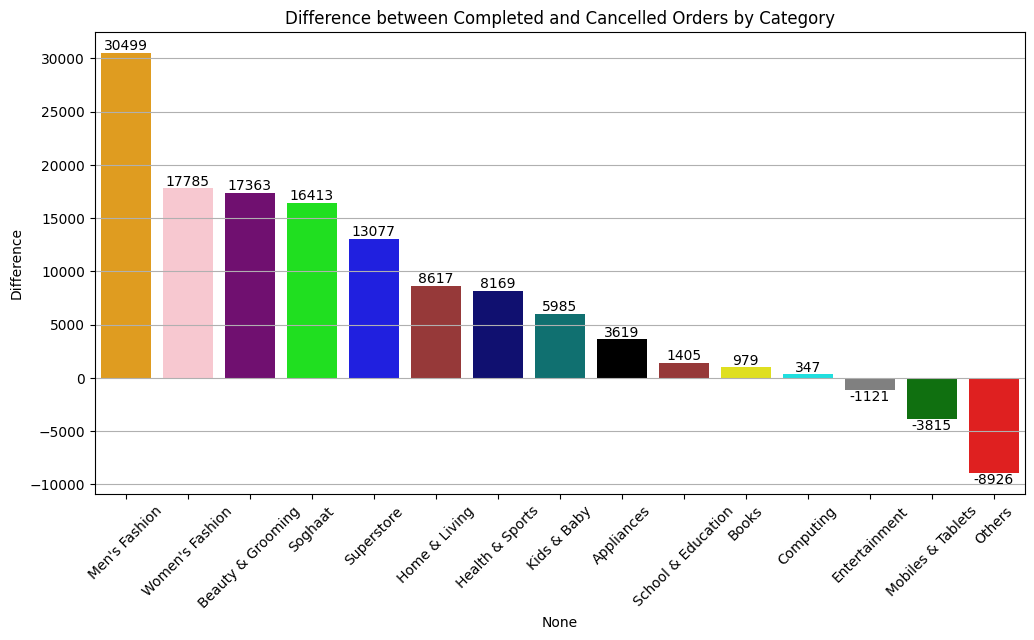

In [21]:
#plotting difference between completed and cancelled orders
difference_df = pd.DataFrame.from_dict(difference, orient='index', columns=['Difference'])
difference_df = difference_df.sort_values(by='Difference', ascending=False)
#plotting graph
plt.figure(figsize = (12, 6))
ax = sns.barplot(x=difference_df.index, y='Difference', data=difference_df, palette=palette)
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")
plt.xticks(rotation=45)
plt.title('Difference between Completed and Cancelled Orders by Category')
plt.grid(axis='y')
plt.show()

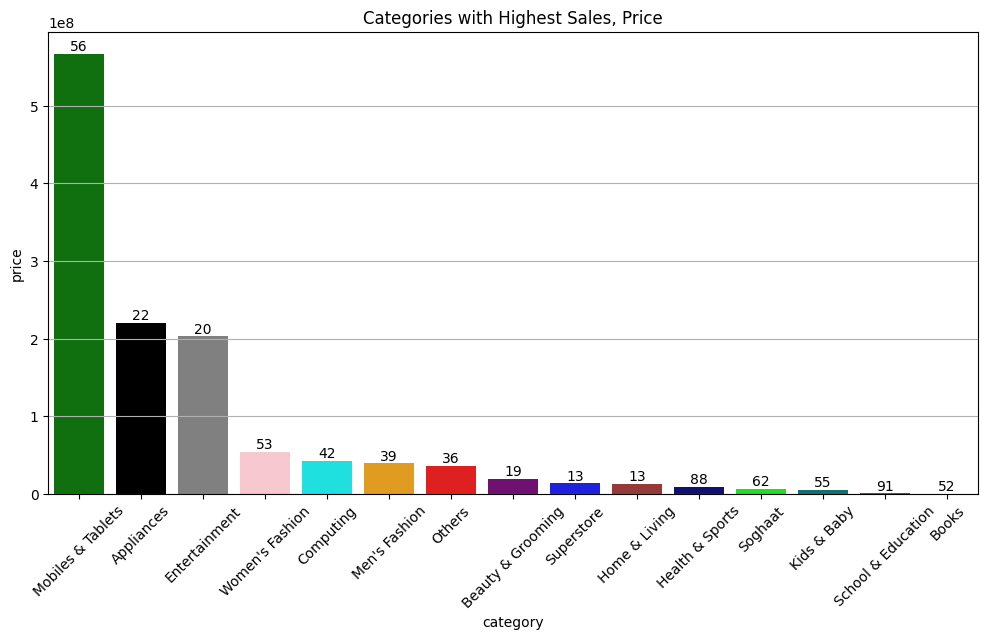

In [22]:
#Orders with who are best sellers in terms of price
price = df[df['order_status'] == 'complete'].groupby('category').agg({'price':'sum'}).reset_index().sort_values(by = 'price', ascending = False).reset_index(drop = True)
#plotting graph for highest selling category, according to price in completed orders
plt.figure(figsize = (12,6))
ax = sns.barplot(data = price, x = "category", y = "price", hue = "category", palette = palette, order = price['category'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, labels=[str(int(v.get_height()))[:2] for v in container], fmt="%.0f")
plt.grid(axis = "y")
plt.xticks(rotation = 45)
plt.title("Categories with Highest Sales, Price")
plt.show()

In [23]:
price

,category,price
0,Mobiles & Tablets,"566,827,372.58"
1,Appliances,"220,267,563.35"
2,Entertainment,"203,192,181.07"
3,Women's Fashion,"53,969,874.72"
4,Computing,"42,931,380.54"
5,Men's Fashion,"39,360,597.93"
6,Others,"36,442,411.00"
7,Beauty & Grooming,"19,319,127.96"
8,Superstore,"13,635,387.71"
9,Home & Living,"13,225,433.08"


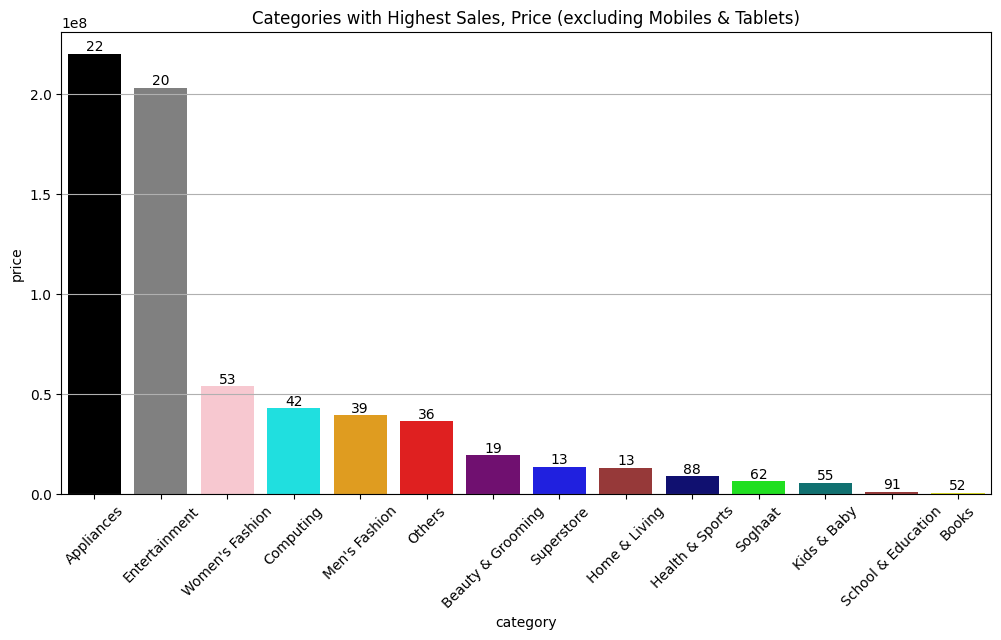

In [24]:
#Orders with who are best sellers in terms of price
price1 = price[price['category'] != 'Mobiles & Tablets']
#plotting graph for highest selling category, according to price in completed orders
plt.figure(figsize = (12,6))
ax = sns.barplot(data = price1, x = "category", y = "price", hue = "category", palette = palette, order = price1['category'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, labels=[str(int(v.get_height()))[:2] for v in container], fmt="%.0f")
plt.grid(axis = "y")
plt.xticks(rotation = 45)
plt.title("Categories with Highest Sales, Price (excluding Mobiles & Tablets)")
plt.show()

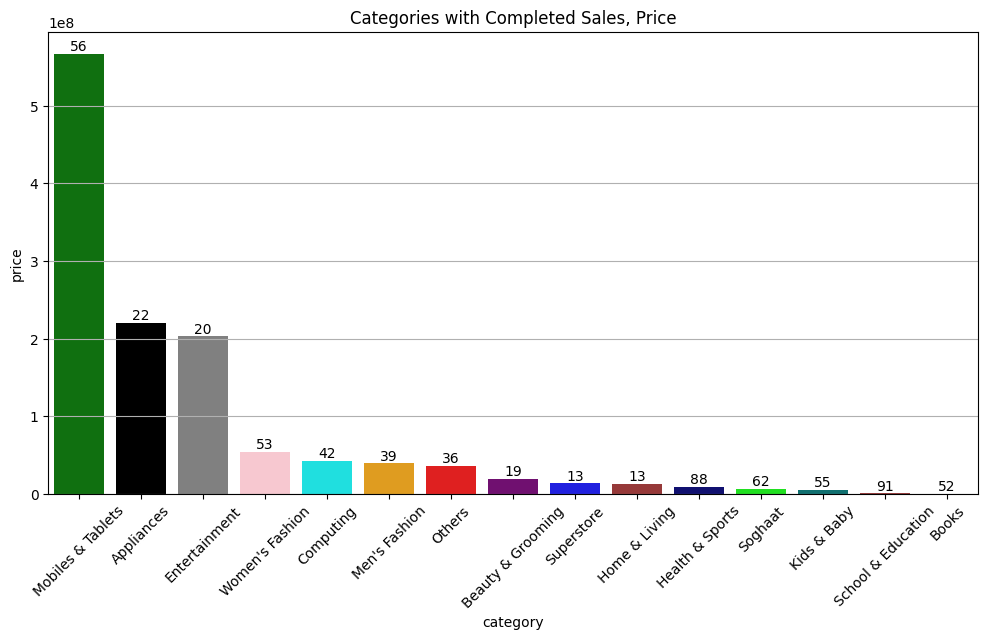

In [25]:
#plotting graph for highest selling category, Only Completed orders
p_completed = df[df["order_status"] == "complete"].groupby("category").agg({"price":"sum"}).reset_index().sort_values(by = "price", ascending = False).reset_index(drop = True)
plt.figure(figsize = (12,6))
ax = sns.barplot(data = p_completed, x = "category", y = "price", hue = "category", palette = palette, order = p_completed['category'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, labels=[str(int(v.get_height()))[:2] for v in container], fmt="%.0f")
plt.grid(axis = "y")
plt.xticks(rotation = 45)
plt.title("Categories with Completed Sales, Price")
plt.show()

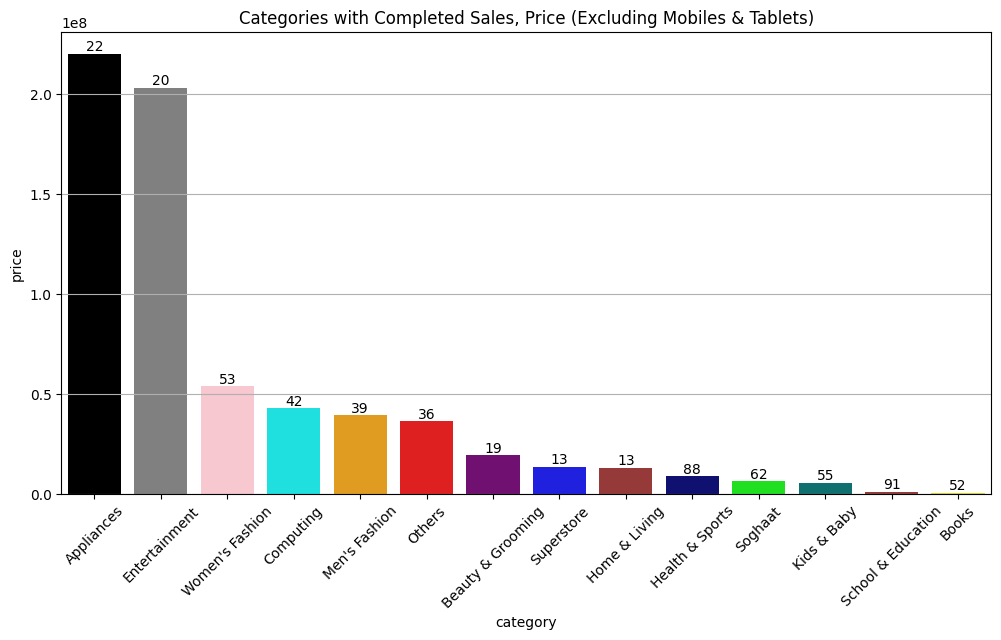

In [26]:
#categories with completed sales excluding mobiles and tablets
p_completed1 = p_completed[p_completed['category'] != 'Mobiles & Tablets']
#plotting graph for completed sales excluding mobiles and tablets
plt.figure(figsize = (12,6))
ax = sns.barplot(data = p_completed1, x = "category", y = "price", hue = "category", palette = palette, order = p_completed1['category'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, labels=[str(int(v.get_height()))[:2] for v in container], fmt="%.0f")
plt.grid(axis = "y")
plt.xticks(rotation = 45)
plt.title("Categories with Completed Sales, Price (Excluding Mobiles & Tablets)")
plt.show()

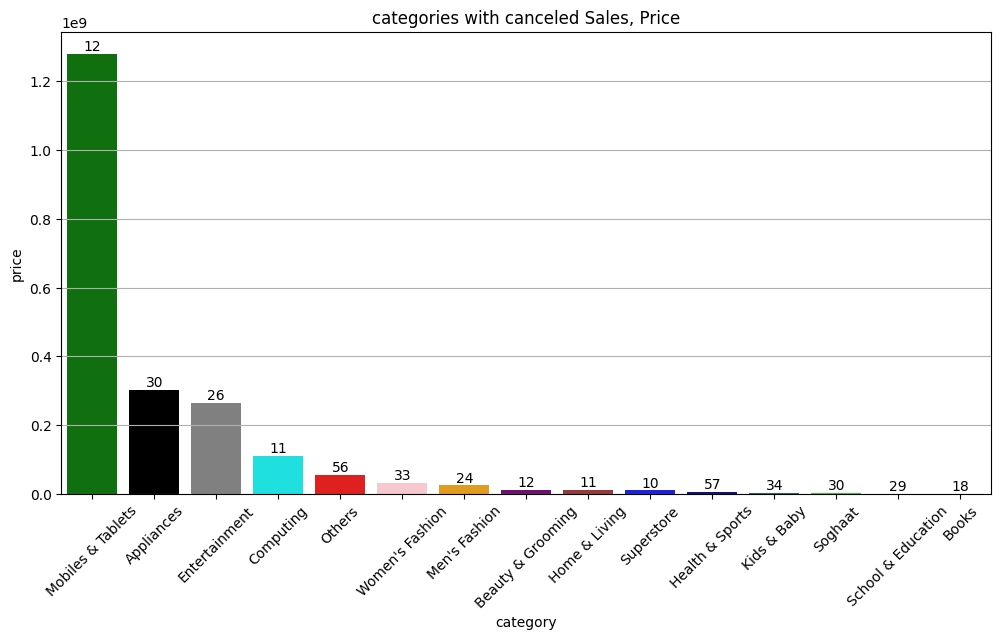

In [27]:
#plotting graph for highest selling category, Only Cancelled orders
p_cancelled = df[df["order_status"] == "canceled"].groupby("category").agg({"price":"sum"}).reset_index().sort_values(by = "price", ascending = False).reset_index(drop = True)
plt.figure(figsize = (12,6))
ax = sns.barplot(data = p_cancelled, x = "category", y = "price", hue = "category", palette = palette, order = p_cancelled['category'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, labels=[str(int(v.get_height()))[:2] for v in container], fmt="%.0f")
plt.grid(axis = "y")
plt.xticks(rotation = 45)
plt.title("categories with canceled Sales, Price")
plt.show()

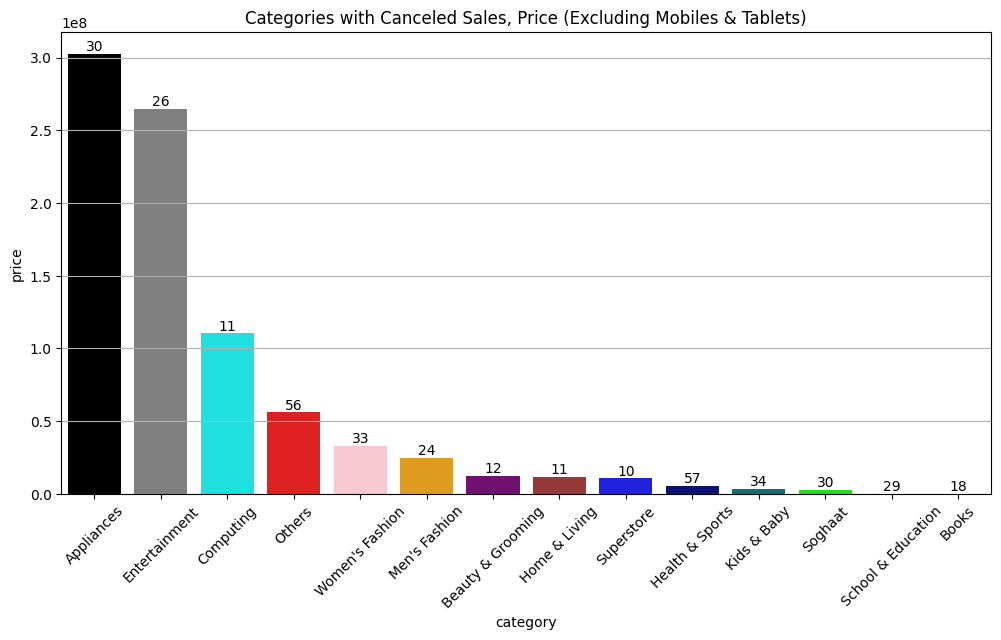

In [28]:
#Categories with Canceled Sales in Terms of Price (Excluding Mobiles & Tablets)
p_cancelled1 = p_cancelled[p_cancelled['category'] != 'Mobiles & Tablets']
#plotting graph for canceled sales excluding mobiles and tablets
plt.figure(figsize = (12,6))
ax = sns.barplot(data = p_cancelled1, x = "category", y = "price", hue = "category", palette = palette, order = p_cancelled1['category'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, labels=[str(int(v.get_height()))[:2] for v in container], fmt="%.0f")
plt.grid(axis = "y")
plt.xticks(rotation = 45)
plt.title("Categories with Canceled Sales, Price (Excluding Mobiles & Tablets)")
plt.show()

In [29]:

complete = p_completed["price"].tolist()
canceled = p_cancelled["price"].tolist()
print("complete")
print(complete)
print("canceled")
print(canceled)
# Subtract corresponding elements of the lists
print("difference")
p_difference = [c - x for c, x in zip(complete, canceled)]
print(p_difference)
# difference = [str(x).replace("-", "+") for x in difference]
# difference

complete
[566827372.58, 220267563.35, 203192181.07, 53969874.72, 42931380.54, 39360597.93, 36442411.0, 19319127.96, 13635387.71, 13225433.08, 8807846.55, 6264205.75, 5559964.29, 919627.41, 523987.9]
canceled
[1279636619.64, 302464335.41, 264743395.92, 110331238.25, 56036473.0, 33280810.78, 24773608.91, 12418987.82, 11919750.7, 10884074.42, 5777788.09, 3422054.03, 3021543.05, 296012.51, 181014.65]
difference
[-712809247.0600001, -82196772.06000003, -61551214.849999994, -56361363.53, -13105092.46, 6079787.1499999985, 11668802.09, 6900140.140000001, 1715637.0100000016, 2341358.66, 3030058.460000001, 2842151.72, 2538421.24, 623614.9, 342973.25]


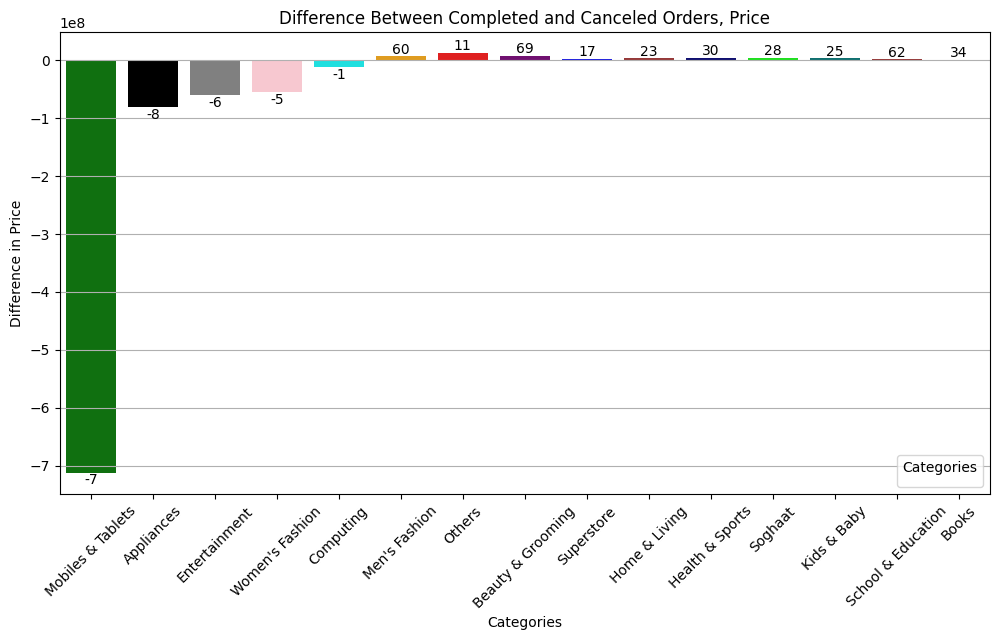

In [30]:
plt.figure(figsize = (12,6))
ax = sns.barplot(y = p_difference, x = p_completed["category"], palette = palette, order = p_completed['category'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, labels=[str(int(v.get_height()))[:2] for v in container], fmt="%.0f")
plt.legend(title = "Categories")
plt.xticks(rotation = 45)
plt.title("Difference Between Completed and Canceled Orders, Price")
plt.grid(axis = "y")
plt.ylabel("Difference in Price")
plt.xlabel("Categories")
plt.show()

[-82196772.06000003, -61551214.849999994, -56361363.53, -13105092.46, 6079787.1499999985, 11668802.09, 6900140.140000001, 1715637.0100000016, 2341358.66, 3030058.460000001, 2842151.72, 2538421.24, 623614.9, 342973.25]


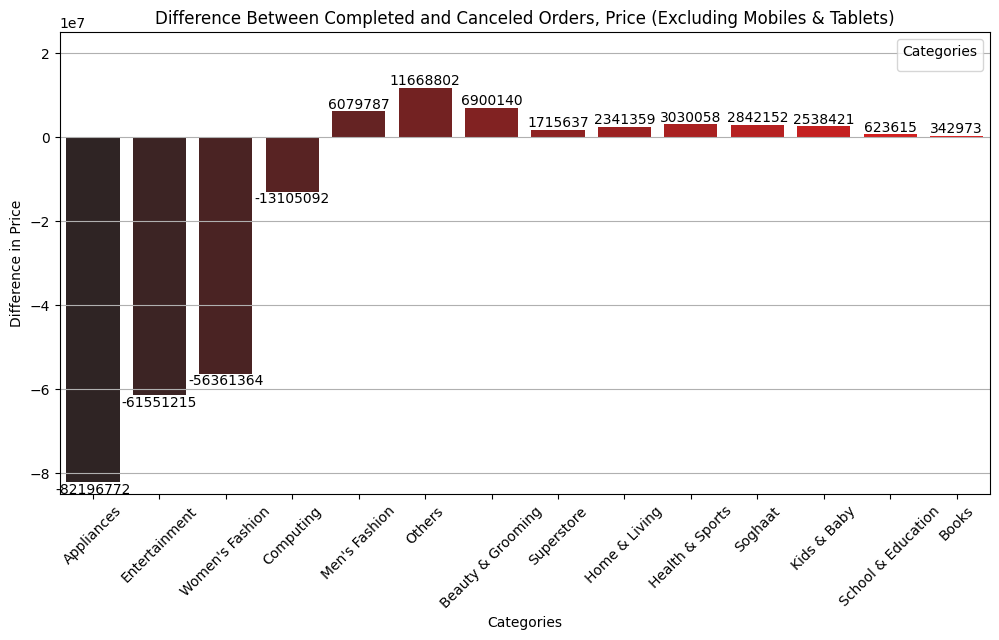

In [31]:
diff_new = p_difference[1:]
print(diff_new)
without_mnt = p_completed[p_completed['category']!= 'Mobiles & Tablets']
plt.figure(figsize = (12,6))
ax = sns.barplot(y = diff_new, x = without_mnt["category"], palette = "dark:red", order = without_mnt['category'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")
plt.legend(title = "Categories")
plt.ylim(-.85e8, +.25e8)
plt.xticks(rotation = 45)
plt.title("Difference Between Completed and Canceled Orders, Price (Excluding Mobiles & Tablets)")
plt.grid(axis = "y")
plt.ylabel("Difference in Price")
plt.xlabel("Categories")
plt.show()

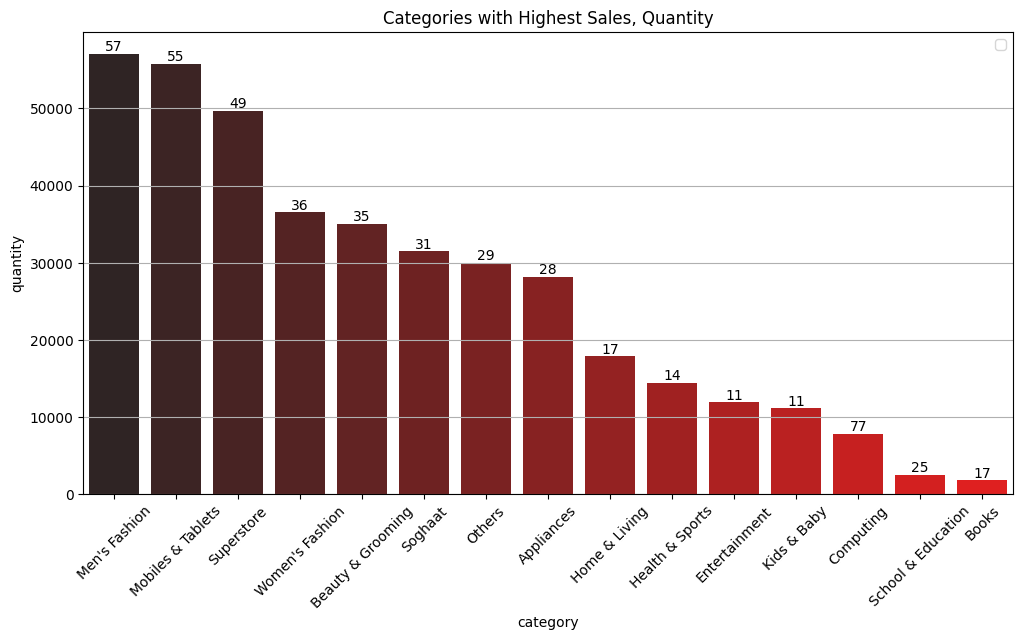

In [32]:
#Checking Completed in terms of quantity
dfq = df[df["order_status"] == "complete"].groupby("category").agg({"quantity":"sum"}).reset_index().sort_values(by = "quantity", ascending = False).reset_index(drop = True)
plt.figure(figsize = (12, 6))
ax = sns.barplot(x ="category",y = "quantity", data = dfq, palette = "dark:red", order = dfq['category'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, labels=[str(int(v.get_height()))[:2] for v in container], fmt="%.0f")
plt.xticks(rotation = 45)
plt.title("Categories with Highest Sales, Quantity")
plt.grid(axis = "y")
plt.legend()
plt.show()

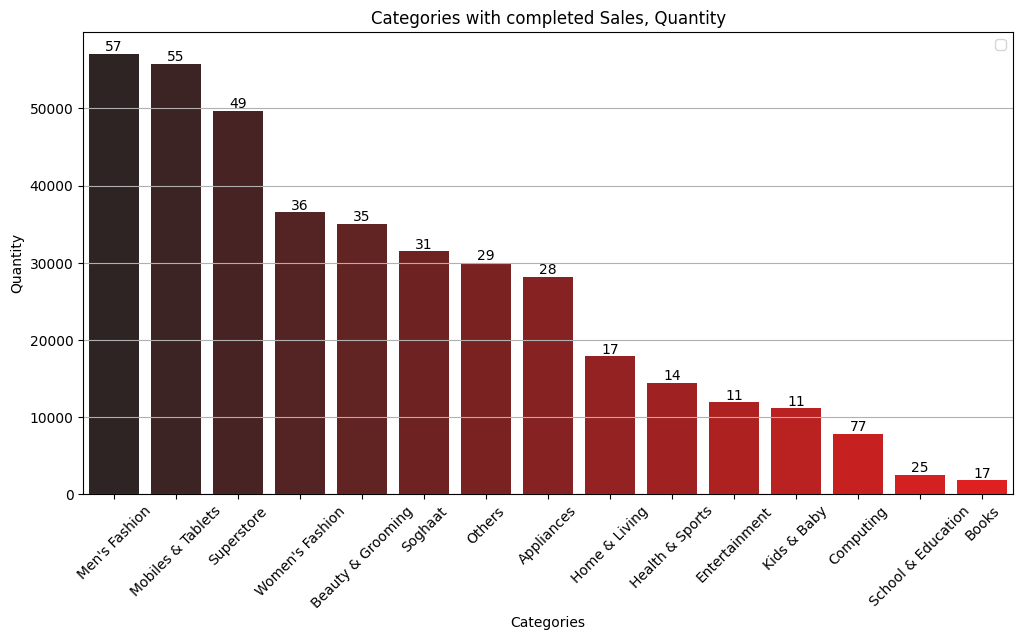

In [33]:
#Checking Completed in terms of quantity
dfq = df[df["order_status"] == "complete"].groupby("category").agg({"quantity":"sum"}).reset_index().sort_values(by = "quantity", ascending = False).reset_index(drop = True)
plt.figure(figsize = (12, 6))
ax = sns.barplot(x ="category",y = "quantity", data = dfq, palette = "dark:red", order = dfq['category'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, labels=[str(int(v.get_height()))[:2] for v in container], fmt="%.0f")
plt.title("Categories with completed Sales, Quantity")
plt.xticks(rotation = 45)
plt.xlabel("Categories")
plt.ylabel("Quantity")
plt.grid(axis = "y")
plt.legend()
plt.show()

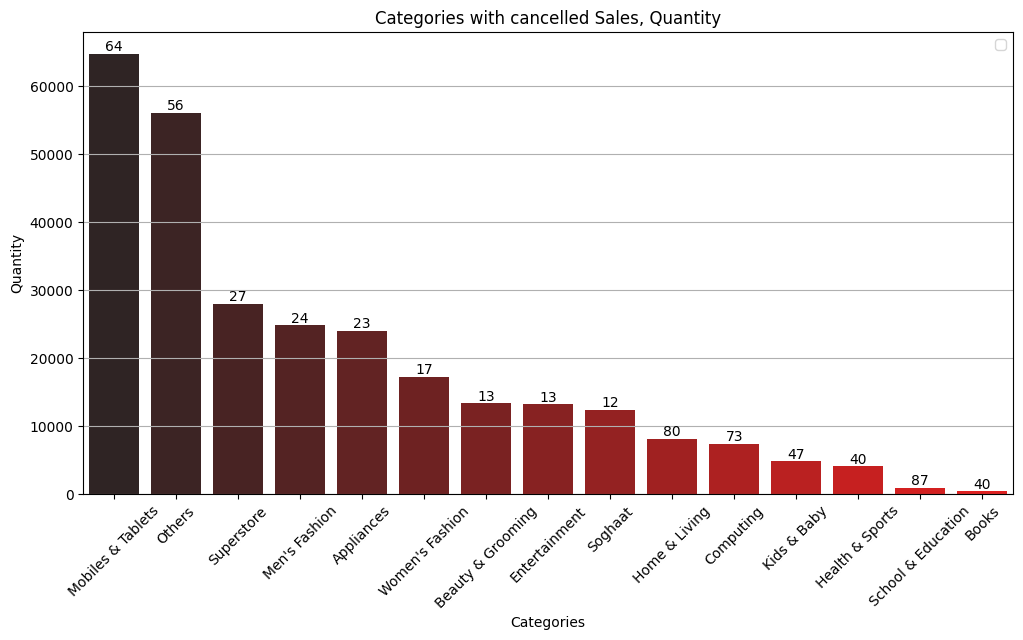

In [34]:
#Checking Canceled in terms of quantity
dfqc = df[df["order_status"] == "canceled"].groupby("category").agg({"quantity":"sum"}).reset_index().sort_values(by = "quantity", ascending = False).reset_index(drop = True)
dfqc
plt.figure(figsize = (12, 6))
ax = sns.barplot(x ="category",y = "quantity", data = dfqc, palette = "dark:red", order = dfqc['category'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, labels=[str(int(v.get_height()))[:2] for v in container], fmt="%.0f")
plt.title("Categories with cancelled Sales, Quantity")
plt.xticks(rotation = 45)
plt.xlabel("Categories")
plt.ylabel("Quantity")
plt.grid(axis = "y")
plt.legend()
plt.show()

In [35]:
#difference between completed and cancelled orders in terms of quantity
diffq = df[df['order_status'] == 'complete']['category'].value_counts().to_dict()
diffqc = df[df['order_status'] == 'canceled']['category'].value_counts().to_dict()
differenceq = Counter(diffq)
differenceq.subtract(Counter(diffqc))
print(differenceq)

Counter({"Men's Fashion": 30499, "Women's Fashion": 17785, 'Beauty & Grooming': 17363, 'Soghaat': 16413, 'Superstore': 13077, 'Home & Living': 8617, 'Health & Sports': 8169, 'Kids & Baby': 5985, 'Appliances': 3619, 'School & Education': 1405, 'Books': 979, 'Computing': 347, 'Entertainment': -1121, 'Mobiles & Tablets': -3815, 'Others': -8926})


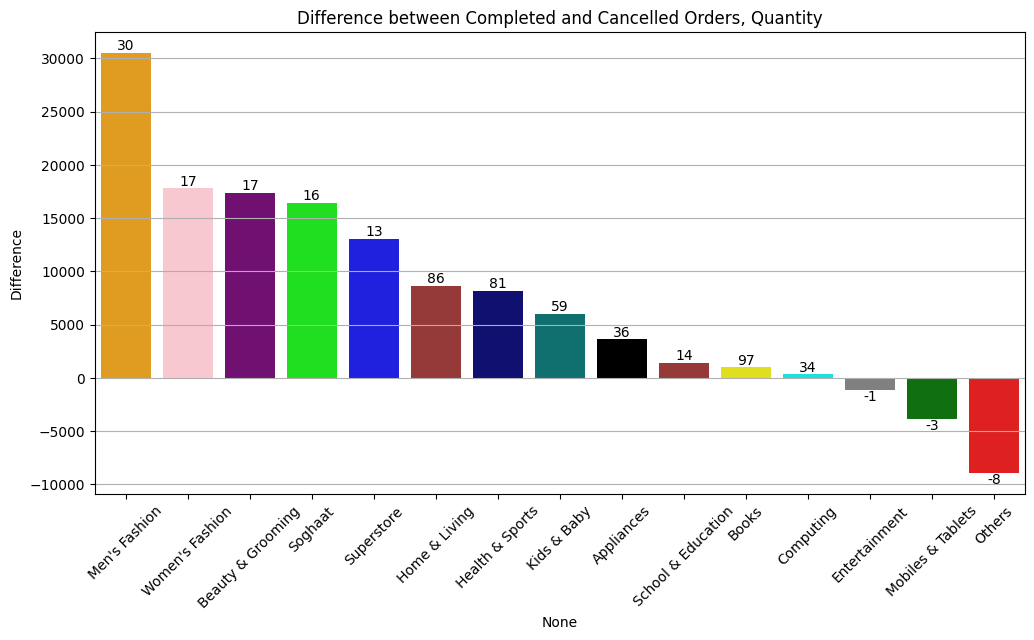

In [36]:
differenceq_df = pd.DataFrame.from_dict(differenceq, orient='index', columns=['Difference'])
differenceq_df = differenceq_df.sort_values(by='Difference', ascending=False)
#plotting graph
plt.figure(figsize = (12, 6))
ax = sns.barplot(x=differenceq_df.index, y='Difference', data=differenceq_df, palette=palette)
for container in ax.containers:
    ax.bar_label(container, labels=[str(int(v.get_height()))[:2] for v in container], fmt="%.0f")
plt.xticks(rotation=45)
plt.title('Difference between Completed and Cancelled Orders, Quantity')
plt.grid(axis='y')
plt.show()

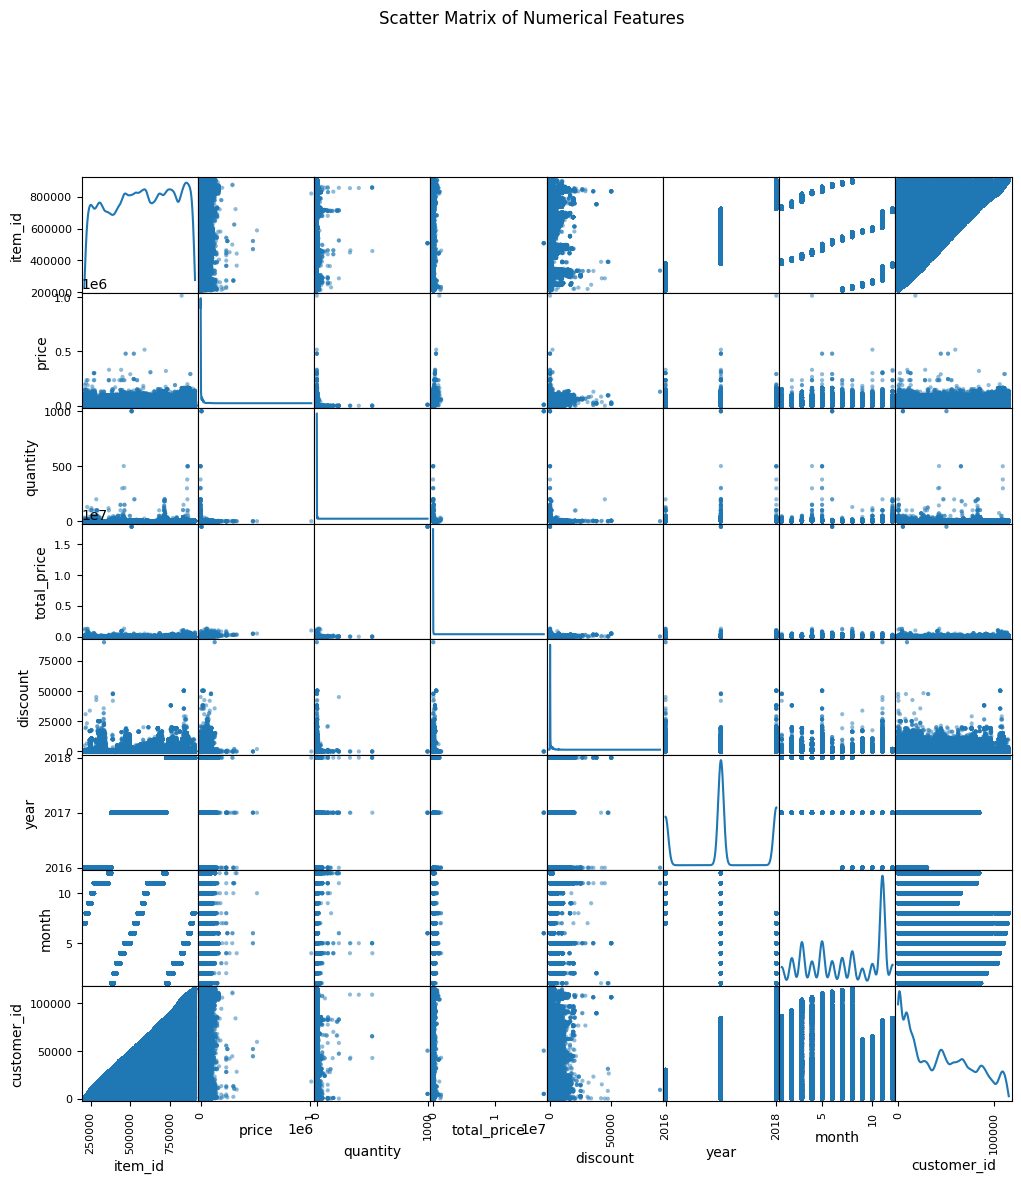

In [37]:
pd.plotting.scatter_matrix(df, figsize=(12, 12), diagonal='kde')
plt.suptitle("Scatter Matrix of Numerical Features", y=1.02)
plt.show()

In [38]:
df

,item_id,order_status,created_at,product_id,price,quantity,total_price,increment_id,category,sales_commission_code,discount,payment_method,working_date,bi_status,MV,year,month,customer_since,month_year,financial_year,customer_id
0,"211,131.00",complete,2016-07-01,kreations_YI 06-L,"1,950.00",1.00,"1,950.00",100147443,Women's Fashion,\N,0.00,cod,7/1/2016,#REF!,"1,950","2,016.00",7.00,2016-07-01,2016-07-01,FY17,1.00
1,"211,133.00",canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.00,1.00,240.00,100147444,Beauty & Grooming,\N,0.00,cod,7/1/2016,Gross,240,"2,016.00",7.00,2016-07-01,2016-07-01,FY17,2.00
2,"211,134.00",canceled,2016-07-01,Ego_UP0017-999-MR0,"2,450.00",1.00,"2,450.00",100147445,Women's Fashion,\N,0.00,cod,7/1/2016,Gross,"2,450","2,016.00",7.00,2016-07-01,2016-07-01,FY17,3.00
3,"211,135.00",complete,2016-07-01,kcc_krone deal,360.00,1.00,60.00,100147446,Beauty & Grooming,R-FSD-52352,300.00,cod,7/1/2016,Net,360,"2,016.00",7.00,2016-07-01,2016-07-01,FY17,4.00
4,"211,136.00",refund,2016-07-01,BK7010400AG,555.00,2.00,"1,110.00",100147447,Soghaat,\N,0.00,cod,7/1/2016,Valid,"1,110","2,016.00",7.00,2016-07-01,2016-07-01,FY17,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,"905,204.00",pending,2018-08-28,WOFSCE5AE00357AECDE,699.00,1.00,849.00,100562385,Women's Fashion,\N,0.00,cod,8/28/2018,Valid,699,"2,018.00",8.00,2018-08-01,2018-08-01,FY19,"115,320.00"
584520,"905,205.00",pending,2018-08-28,MATHUA5AF70A7D1E50A,"35,599.00",1.00,"35,899.00",100562386,Mobiles & Tablets,\N,0.00,bankalfalah,8/28/2018,Gross,"35,599","2,018.00",8.00,2018-08-01,2018-08-01,FY19,"115,326.00"
584521,"905,206.00",pending,2018-08-28,MATSAM5B6D7208C6D30,"129,999.00",2.00,"652,178.00",100562387,Mobiles & Tablets,\N,0.00,bankalfalah,8/28/2018,Gross,"259,998","2,018.00",8.00,2018-07-01,2018-08-01,FY19,"113,474.00"
584522,"905,207.00",pending,2018-08-28,MATSAM5B1509B4696EA,"87,300.00",2.00,"652,178.00",100562387,Mobiles & Tablets,\N,0.00,bankalfalah,8/28/2018,Gross,"174,600","2,018.00",8.00,2018-07-01,2018-08-01,FY19,"113,474.00"


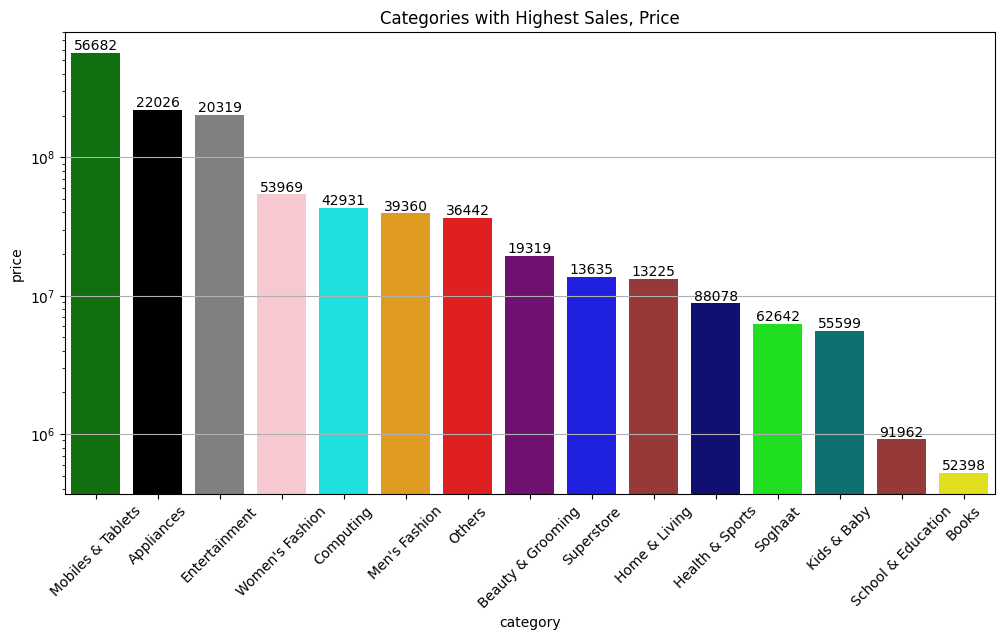

In [39]:
#Orders with who are best sellers in terms of price
price = df[df['order_status'] == 'complete'].groupby('category').agg({'price':'sum'}).reset_index().sort_values(by = 'price', ascending = False).reset_index(drop = True)
#plotting graph for highest selling category, according to price in completed orders
plt.figure(figsize = (12,6))
ax = sns.barplot(data = price, x = "category", y = "price", hue = "category", palette = palette, order = price['category'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, labels=[str(int(v.get_height()))[:5] for v in container], fmt="%.0f")
ax.set_yscale('log')
plt.grid(axis = "y")
plt.xticks(rotation = 45)
plt.title("Categories with Highest Sales, Price")
plt.show()

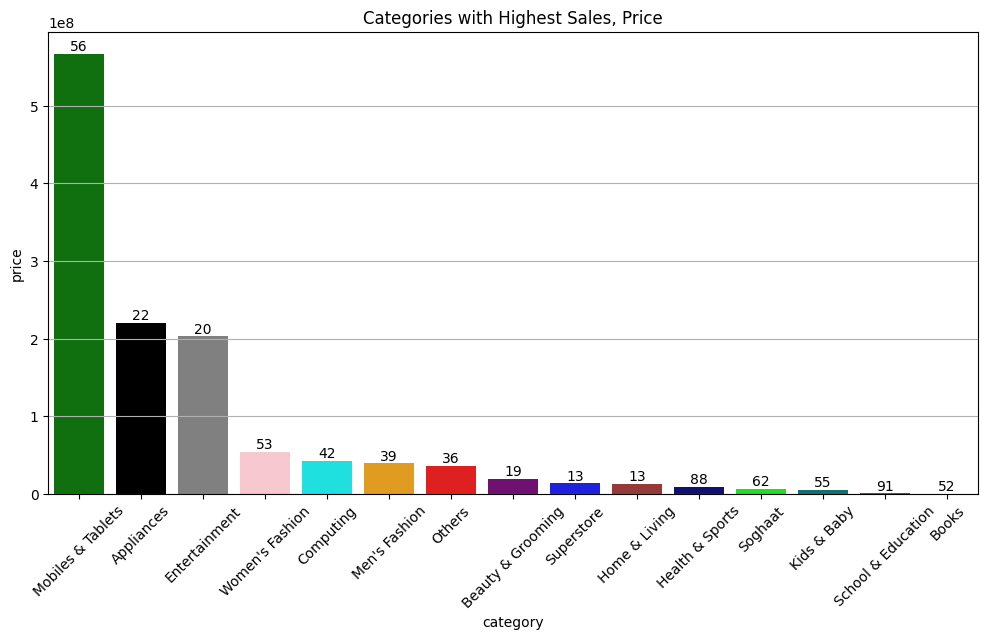

In [40]:
#Orders with who are best sellers in terms of price
price = df[df['order_status'] == 'complete'].groupby('category').agg({'price':'sum'}).reset_index().sort_values(by = 'price', ascending = False).reset_index(drop = True)
#plotting graph for highest selling category, according to price in completed orders
plt.figure(figsize = (12,6))
ax = sns.barplot(data = price, x = "category", y = "price", hue = "category", palette = palette, order = price['category'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, labels=[str(int(v.get_height()))[:2] for v in container], fmt="%.0f")
plt.grid(axis = "y")
plt.xticks(rotation = 45)
plt.title("Categories with Highest Sales, Price")
plt.show()


----- Correlation Matrix -----
                               item_id  price  quantity  total_price  \
item_id                           1.00   0.14      0.03         0.05   
price                             0.14   1.00     -0.02         0.28   
quantity                          0.03  -0.02      1.00         0.75   
total_price                       0.05   0.28      0.75         1.00   
discount                          0.14   0.46     -0.01         0.10   
year                              0.92   0.13      0.04         0.05   
month                            -0.29  -0.03     -0.03        -0.02   
customer_id                       0.78   0.16      0.03         0.05   
order_status_encoded             -0.09  -0.13     -0.01        -0.05   
created_at_encoded                1.00   0.14      0.03         0.05   
product_id_encoded               -0.30  -0.10      0.01        -0.02   
increment_id_encoded              1.00   0.14      0.03         0.05   
category_encoded                

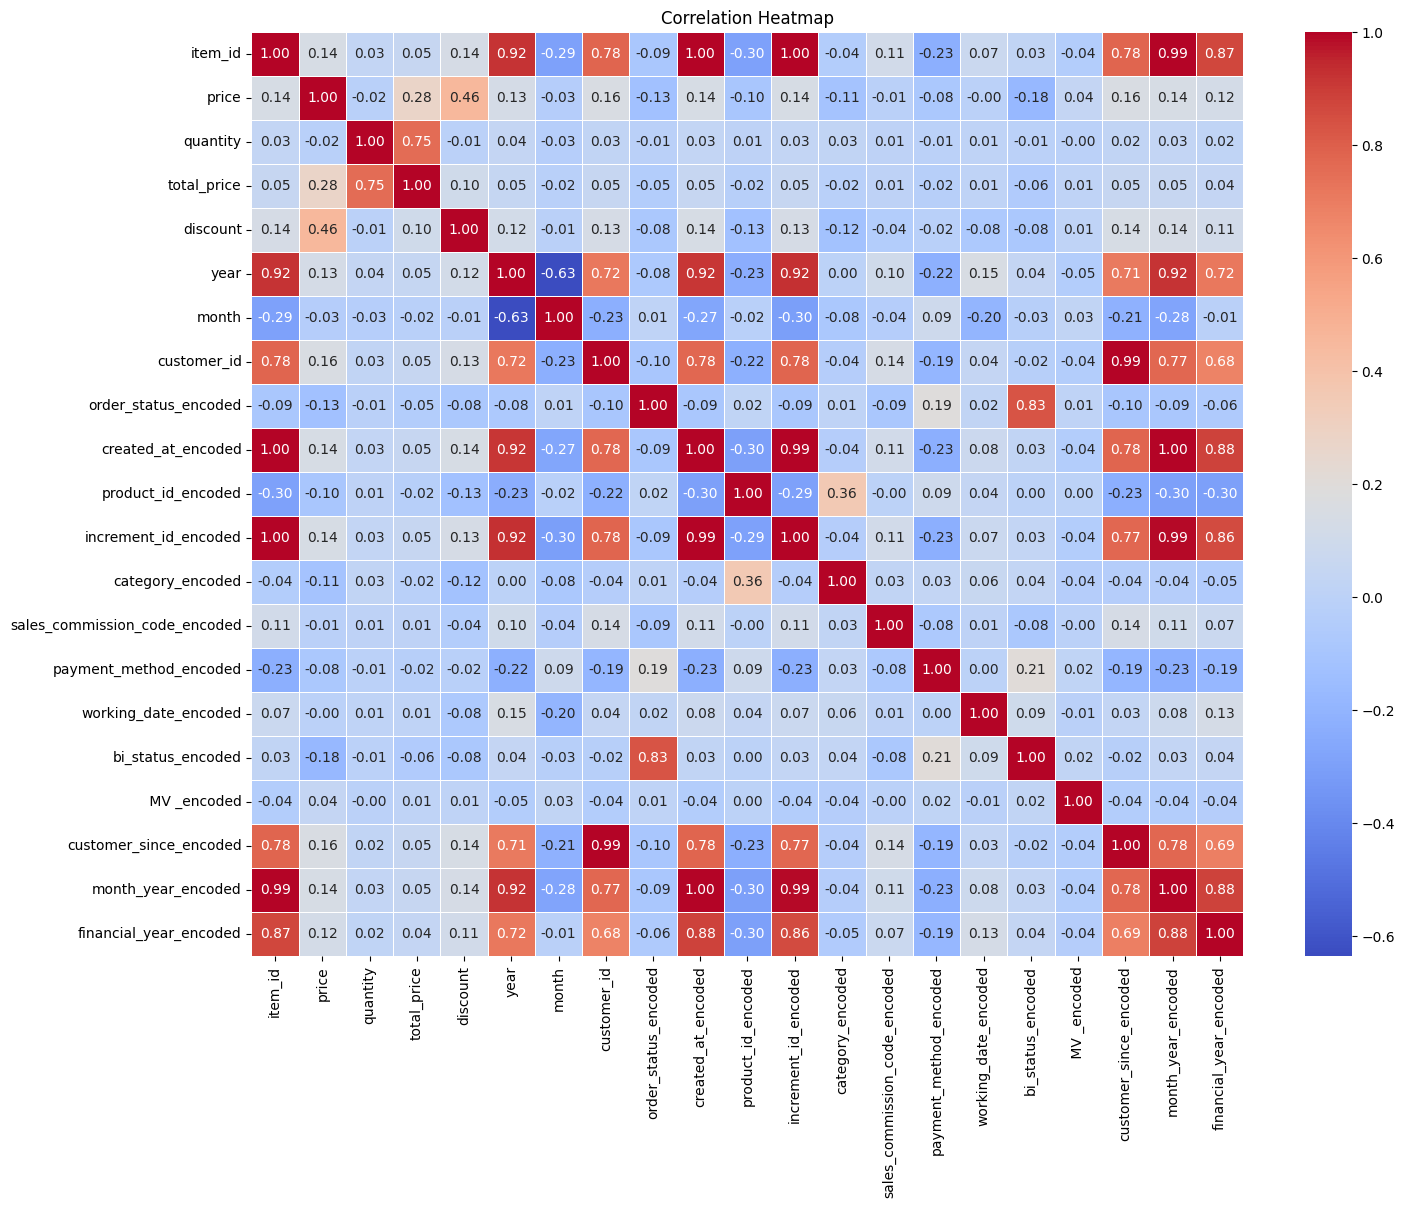

In [5]:
#Encode categorical columns automatically
for col in df.select_dtypes(include='object').columns:
    df[col + "_encoded"] = df[col].astype('category').cat.codes

# Step 3: Correlation
corr = df.select_dtypes(include='number').corr()
print("\n----- Correlation Matrix -----")
print(corr)

# Step 4: Heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()